In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import shapiro, t

In [3]:
# Se lee la data y se eliminan las columnas indicada en el enuncia
house = pd.read_csv("/content/house.csv")
new_house = house.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage'],axis=1)

# Se eligen 20 variables. El criterio fue, elegir las variables que puedan tener mayor incidencia en el precio de venta de las viviendas (SalePrice)
new_house = new_house[['SalePrice','LotArea','PoolArea','TotalBsmtSF','YearBuilt','GrLivArea','GarageArea','BedroomAbvGr','KitchenAbvGr','FullBath','TotRmsAbvGrd','Fireplaces','MSSubClass','Utilities','Neighborhood','OverallCond','ExterCond','GarageCars','WoodDeckSF','OpenPorchSF']]
new_house.head()

,SalePrice,LotArea,PoolArea,TotalBsmtSF,YearBuilt,GrLivArea,GarageArea,BedroomAbvGr,KitchenAbvGr,FullBath,TotRmsAbvGrd,Fireplaces,MSSubClass,Utilities,Neighborhood,OverallCond,ExterCond,GarageCars,WoodDeckSF,OpenPorchSF
0,208500,8450,0,856,2003,1710,548,3,1,2,8,0,60,AllPub,CollgCr,5,TA,2,0,61
1,181500,9600,0,1262,1976,1262,460,3,1,2,6,1,20,AllPub,Veenker,8,TA,2,298,0
2,223500,11250,0,920,2001,1786,608,3,1,2,6,1,60,AllPub,CollgCr,5,TA,2,0,42
3,140000,9550,0,756,1915,1717,642,3,1,1,7,1,70,AllPub,Crawfor,5,TA,3,0,35
4,250000,14260,0,1145,2000,2198,836,4,1,2,9,1,60,AllPub,NoRidge,5,TA,3,192,84


In [4]:
new_house.info()
#Hay 20 columnas, ninguna tiene datos faltantes. Hay 1460 filas en total, de ellas, se hará una selección, intentando dejar posibles outliers fuera

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   PoolArea      1460 non-null   int64 
 3   TotalBsmtSF   1460 non-null   int64 
 4   YearBuilt     1460 non-null   int64 
 5   GrLivArea     1460 non-null   int64 
 6   GarageArea    1460 non-null   int64 
 7   BedroomAbvGr  1460 non-null   int64 
 8   KitchenAbvGr  1460 non-null   int64 
 9   FullBath      1460 non-null   int64 
 10  TotRmsAbvGrd  1460 non-null   int64 
 11  Fireplaces    1460 non-null   int64 
 12  MSSubClass    1460 non-null   int64 
 13  Utilities     1460 non-null   object
 14  Neighborhood  1460 non-null   object
 15  OverallCond   1460 non-null   int64 
 16  ExterCond     1460 non-null   object
 17  GarageCars    1460 non-null   int64 
 18  WoodDeckSF    1460 non-null   int64 
 19  OpenPo

In [5]:
new_house.describe(percentiles=[0.05,0.25,0.75,0.99]).transpose()
# En este resumen, vemos datos posiblemente atípicos en los maximos del precio, área del lote, área total de sótano, área de piscina
# Podemos ver en la desviación estándar, que las columnas área de piscina y las terrazas de madera (WoodDeck) tienen sus datos muy dispersos


,count,mean,std,min,5%,25%,50%,75%,99%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,88000.0,129975.00,163000.0,214000.00,442567.01,755000.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,3311.7,7553.50,9478.5,11601.50,37567.64,215245.0
PoolArea,1460.0,2.758904,40.177307,0.0,0.0,0.00,0.0,0.00,0.00,738.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,519.3,795.75,991.5,1298.25,2155.05,6110.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1916.0,1954.00,1973.0,2000.00,2009.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,848.0,1129.50,1464.0,1776.75,3123.48,5642.0
GarageArea,1460.0,472.980137,213.804841,0.0,0.0,334.50,480.0,576.00,1002.79,1418.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,2.00,3.0,3.00,5.00,8.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.0,1.00,1.0,1.00,2.00,3.0
FullBath,1460.0,1.565068,0.550916,0.0,1.0,1.00,2.0,2.00,3.00,3.0


In [6]:
# De este resumen de variables cualitativas solo podemos obtener que AllPub (todos los servicios públicos) es el valor que más se repite en cuanto a utilidades (casi un 100%)
# En cuanto a los vecindarios, donde hay más viviendas vendidas es en North Ames (NAmes)
# y en cuanto a las condiciones externas de las viviendas, en su mayoría estas se encuentran en condiciones promedio/tipico (TA)
new_house.describe(include='object').transpose()

,count,unique,top,freq
Utilities,1460,2,AllPub,1459
Neighborhood,1460,25,NAmes,225
ExterCond,1460,5,TA,1282


<ipython-input-7-12625e6d3d70>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  new_house.hist(ax=ax)


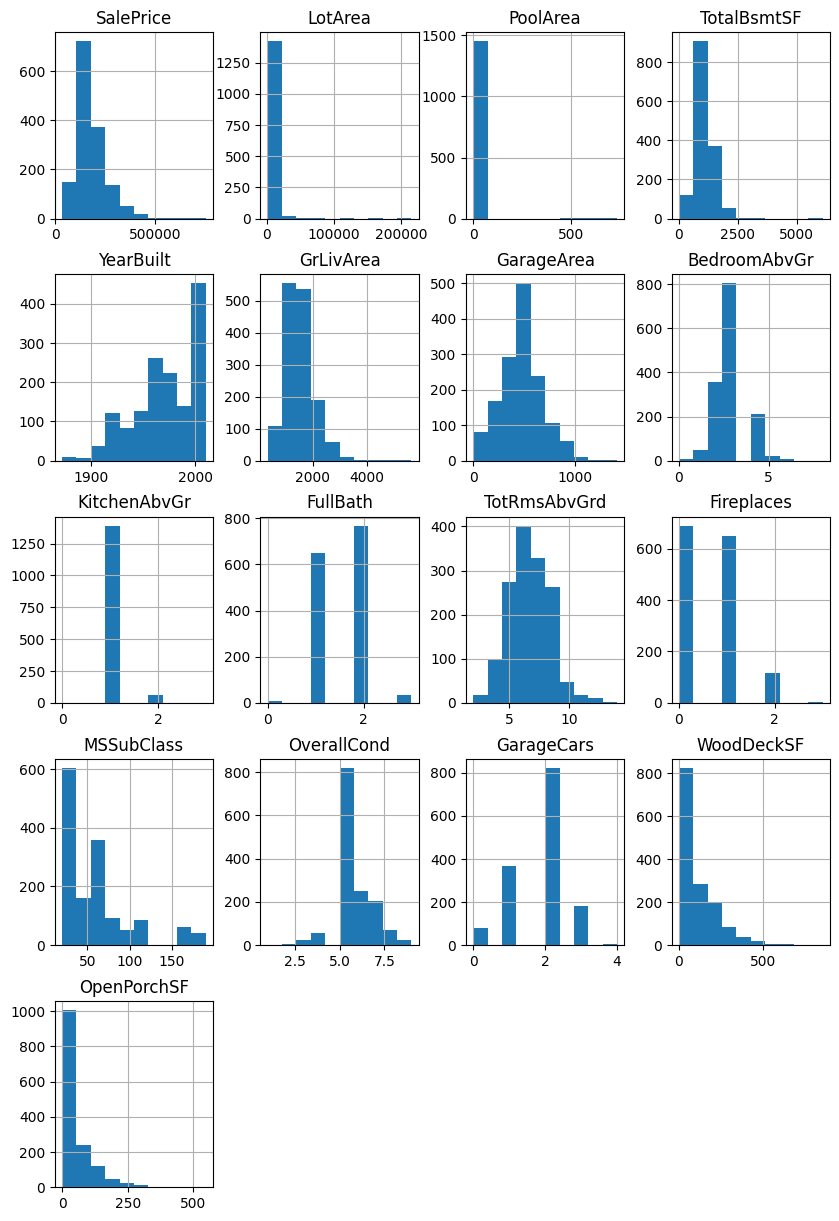

In [7]:
# En los siguientes gráficos de distribución podemos ver algunas variables que podrían seguir una distribución normal (solo por la figura del gráfico)
# estos son SalePrice, TotalBsmtSF, GrLivArea, GarageArea, TotRmsAbvGrd
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
new_house.hist(ax=ax)
plt.show()

In [8]:
# Dado que según los gráficos anteriores las variables no se ven normales, pero podrían serlos, se hará un tratamiento de los outliers
# estos serán eliminados del dataframe

def outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  lista = df.index[ (df[column] < lower) | (df[column] > upper)]
  return lista

index_list = []
for column in new_house.columns:
  if column in new_house.select_dtypes(include=['number']).columns:
    index_list.extend(outliers(new_house, column))

def remove(df, lista):
  lista = sorted(set(lista))
  df = df.drop(lista)
  return df

no_outliers = remove(new_house, index_list)

no_outliers.isnull().any()

SalePrice       False
LotArea         False
PoolArea        False
TotalBsmtSF     False
YearBuilt       False
GrLivArea       False
GarageArea      False
BedroomAbvGr    False
KitchenAbvGr    False
FullBath        False
TotRmsAbvGrd    False
Fireplaces      False
MSSubClass      False
Utilities       False
Neighborhood    False
OverallCond     False
ExterCond       False
GarageCars      False
WoodDeckSF      False
OpenPorchSF     False
dtype: bool

<ipython-input-9-8d44afd94822>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  no_outliers.hist(ax=ax)


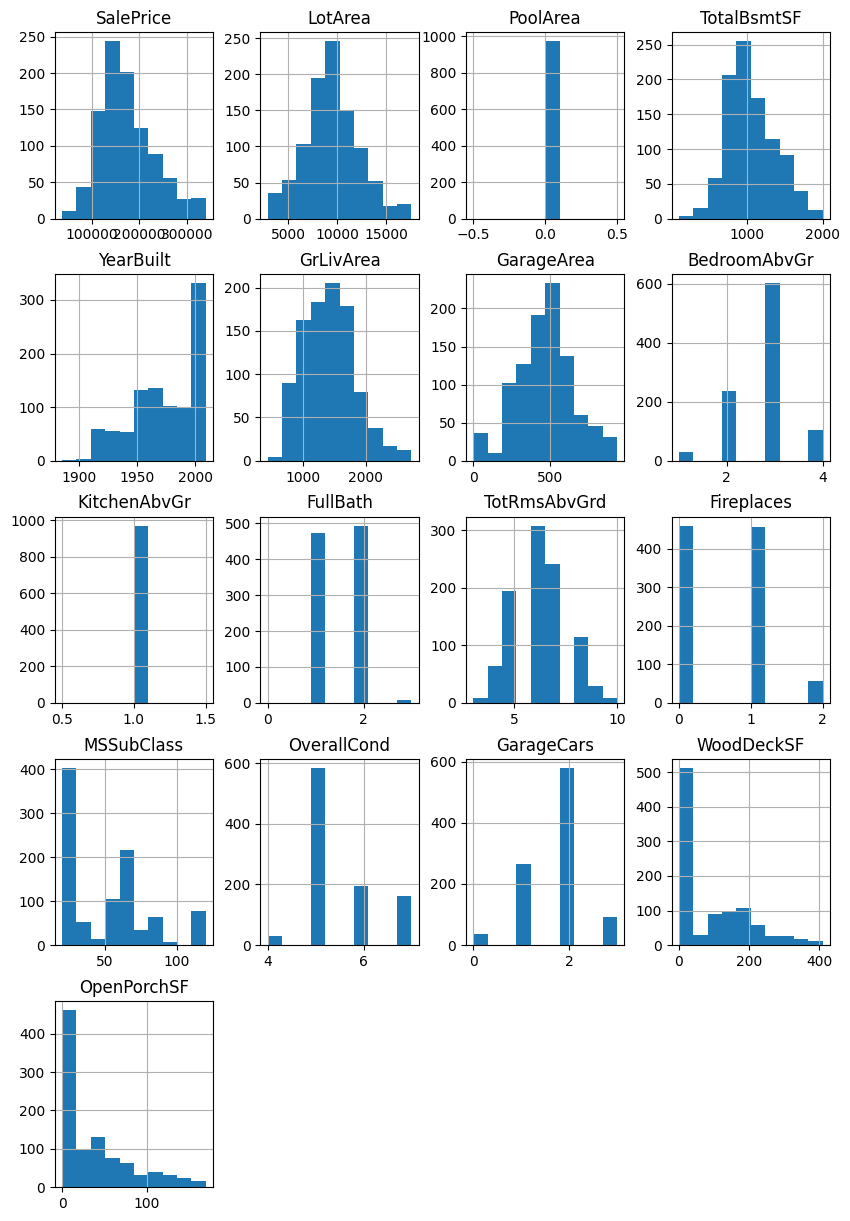

In [9]:
# Ahora volvemos a ver la distribución de las variables, las cuales visualmente han mejorado a una distribución normal
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
no_outliers.hist(ax=ax)
plt.show()

In [10]:
# Ahora podemos corroborar mediante el test de Shapiro-Wilks si las variables distribuyen normal
normal_variables = []
for column in no_outliers.select_dtypes(include=['number']).columns:
    stat, p_value = stats.shapiro(no_outliers[column])
    if p_value > 0.05:  # Si el p-valor es mayor que 0.05, la variable se considera normal
        normal_variables.append(column)
    print(f"Variable: {column}, Estadístico Shapiro-Wilk: {stat}, p-valor: {p_value}")

print("\nVariables que distribuyen normalmente:", normal_variables) # Se indica según el test que esta variables son normales pero según el gráfico solo tienen un valor
# Por lo que a mi criterio no las consideraría que siguen una distribución normal


# Ahora calculamos intervalos de confianza del 95% para las variables numéricas
confidence_intervals = {}
for column in no_outliers.select_dtypes(include=['number']).columns:
    mean = no_outliers[column].mean()
    std = no_outliers[column].std()
    n = len(no_outliers[column])
    margin_of_error = t.ppf(0.975, df=n-1) * (std / (n ** 0.5))
    confidence_intervals[column] = (mean - margin_of_error, mean + margin_of_error)

print("\nIntervalos de confianza del 95%:")
for variable, interval in confidence_intervals.items():
    print(f"{variable}: {interval}")

Variable: SalePrice, Estadístico Shapiro-Wilk: 0.9661341905593872, p-valor: 2.9860899722952e-14
Variable: LotArea, Estadístico Shapiro-Wilk: 0.9900650978088379, p-valor: 3.8160933399922214e-06
Variable: PoolArea, Estadístico Shapiro-Wilk: 1.0, p-valor: 1.0
Variable: TotalBsmtSF, Estadístico Shapiro-Wilk: 0.9785959124565125, p-valor: 9.2219565317464e-11
Variable: YearBuilt, Estadístico Shapiro-Wilk: 0.9120005965232849, p-valor: 2.787643534711992e-23
Variable: GrLivArea, Estadístico Shapiro-Wilk: 0.9804118871688843, p-valor: 3.7664951713090034e-10
Variable: GarageArea, Estadístico Shapiro-Wilk: 0.9813148379325867, p-valor: 7.814507929637671e-10
Variable: BedroomAbvGr, Estadístico Shapiro-Wilk: 0.7934865355491638, p-valor: 2.2409896137144717e-33
Variable: KitchenAbvGr, Estadístico Shapiro-Wilk: 1.0, p-valor: 1.0
Variable: FullBath, Estadístico Shapiro-Wilk: 0.6701301336288452, p-valor: 9.81440017145351e-40
Variable: TotRmsAbvGrd, Estadístico Shapiro-Wilk: 0.9459688663482666, p-valor: 2.27

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Coeficiente de correlación de Pearson entre 'SalePrice' y 'LotArea': 0.3353054834407345
P-valor: 5.726198441520598e-27


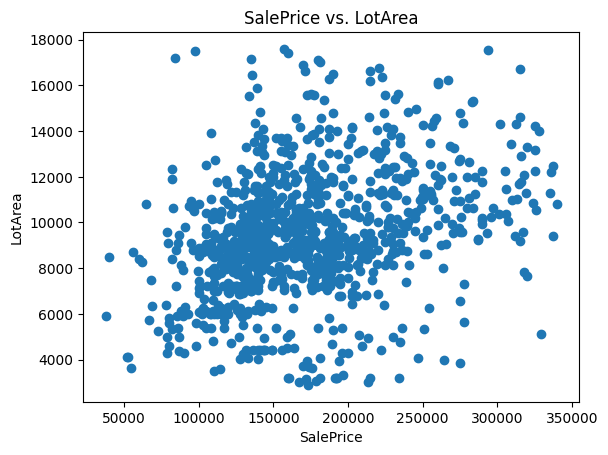

In [11]:
# Queremos probar si hay una correlación significativa entre 'LotArea' y 'SalePrice'
# H0: existe correlación entre LotArea y SalePrice
# HA: no existe correlación entre LotArea y SalePrice
# Alfa 0.05
variable1 = 'SalePrice'
variable2 = 'LotArea'

# Calculamos el coeficiente de correlación de Pearson y el p-valor
correlation_coefficient, p_value = pearsonr(no_outliers[variable1], no_outliers[variable2])

# Imprimimos los resultados
print(f"Coeficiente de correlación de Pearson entre '{variable1}' y '{variable2}': {correlation_coefficient}")
print(f"P-valor: {p_value}")

# Gráfico de dispersión entre 'LotArea' y 'SalePrice' para corroborar lo anterior
plt.scatter(no_outliers[variable1], no_outliers[variable2])
plt.title(f'{variable1} vs. {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Vemos que el valor de p es muy pequeño, por lo que se rechaza la hipótesis nula y las variables de precio y área de lote no tienen correlación
# Esto además es comprobado por la correlación de pearson que es 0.335, lo que indica que hay un correlación positiva y muy débil
# Y en el gráfico de dispersión vemos que los datos no siguen un patrón de recta, están muy dispersos

# La recomendación para el adulto joven, en base a la información de correlación de LotArea y SalePrice, es que no necesariamente, si un lote es muy grande en área
# significa que tendrá un precio alto, por lo que hay otras variables que influyen más en el precio, por lo que el adulto joven podría buscar terrenos grandes a bajo precio

Coeficiente de correlación de Pearson entre 'SalePrice' y 'GrLivArea': 0.7489426301668329
P-valor: 1.4780386316606447e-175


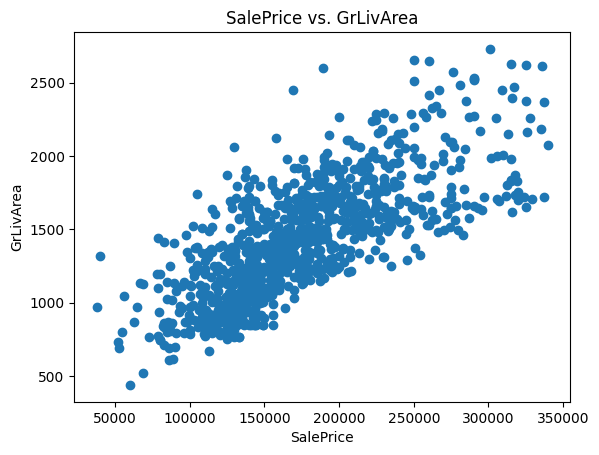

In [15]:
# Queremos probar si hay una correlación significativa entre 'GrLivArea' y 'SalePrice'
# H0: existe correlación entre GrLivArea y SalePrice
# HA: no existe correlación entre GrLivArea y SalePrice
# Alfa 0.05
variable1 = 'SalePrice'
variable2 = 'GrLivArea'

# Calculamos el coeficiente de correlación de Pearson y el p-valor
correlation_coefficient, p_value = pearsonr(no_outliers[variable1], no_outliers[variable2])

# Imprimimos los resultados
print(f"Coeficiente de correlación de Pearson entre '{variable1}' y '{variable2}': {correlation_coefficient}")
print(f"P-valor: {p_value}")

# Gráfico de dispersión entre 'GrLivArea' y 'SalePrice' para corroborar lo anterior
plt.scatter(no_outliers[variable1], no_outliers[variable2])
plt.title(f'{variable1} vs. {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Vemos que el valor de p es muy pequeño, por lo que se rechaza la hipótesis nula y las variables de precio y áreas habitables sobre suelo no tienen correlación
# Sin embargo, la correlación de pearson indica un valor de 0.749, lo que significa una correlación fuerte y positiva
# Y en el gráfico de dispersión vemos que los datos siguen una tendencia de recta, están levemente dispersos
# Según estos datos, existe correlación entre estas variables pero esto no es significativo para nuestras conclusiones
# A pesar de ello, y como nuestros datos no siguen una distribución normal, podemos realizar nuestra recomendación en base a esas variables, ya que si siguieran una distribución normal,
# Quizas el p-valor seria mayor


# La recomendación para el adulto joven, en base a la información de correlación de GrLivArea y SalePrice, es que el adulto joven deberia fijarse en que si elige una vivienda con
# mayor áreas habitables sobre suelo, debería esperarse que estas viviendas tuvieran un precio mayor